**UBER TRIP ANALYSIS**



Steps:

1.    Import necessary libraries
2.    Read the dataset using Pandas
3.   Explore the dataset properties
4.   Visualize the relationship between different variables and draw insights


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Read the dataset
uber_df= pd.read_csv("/content/uber-raw-data-sep14.csv")

#Display the first 5 records
uber_df.head(10)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
5,9/1/2014 0:12:00,40.6735,-73.9918,B02512
6,9/1/2014 0:15:00,40.7471,-73.6472,B02512
7,9/1/2014 0:16:00,40.6613,-74.2691,B02512
8,9/1/2014 0:32:00,40.3745,-73.9999,B02512
9,9/1/2014 0:33:00,40.7633,-73.9773,B02512


In [3]:
#Display the last 5 records
uber_df.tail()

,Date/Time,Lat,Lon,Base
182026,9/18/2014 20:41:00,40.7543,-73.9847,B02598
182027,9/18/2014 20:41:00,40.7282,-74.0027,B02598
182028,9/18/2014 20:41:00,40.7217,-73.9975,B02598
182029,9/18/2014 20:41:00,40.7265,-74.0090,B02598
182030,9/18/2014 20:41:00,40.0000,NaN,NaN


In [4]:
#Find the shape of the dataset
uber_df.shape

(182031, 4)

In [15]:
uber_df.describe()


,Lat,Lon,Day,Hour,Weekday
count,182031.000000,182030.000000,182031.000000,182031.000000,182031.000000
mean,40.739755,-73.972900,10.544896,14.197521,2.820811
std,0.040693,0.061551,6.067996,5.751702,1.867740
min,40.000000,-74.773600,1.000000,0.000000,0.000000
25%,40.721500,-73.997100,5.000000,10.000000,1.000000
50%,40.742800,-73.983700,10.000000,15.000000,3.000000
75%,40.761400,-73.965400,15.000000,19.000000,4.000000
max,41.224600,-72.716300,30.000000,23.000000,6.000000


In [13]:
uber_df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
Day                   int64
Hour                  int64
Weekday               int64
dtype: object

In [16]:
uber_df.shape

(182031, 7)

In [5]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182031 entries, 0 to 182030
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  182031 non-null  object 
 1   Lat        182031 non-null  float64
 2   Lon        182030 non-null  float64
 3   Base       182030 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.6+ MB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [6]:
#Change the "Date/Time" column's data type from string to datetime
uber_df['Date/Time']= pd.to_datetime(uber_df['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime
uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


#### Now we can check the density of rides according to days, hours, and weekdays

Text(0, 0.5, 'Density of rides')

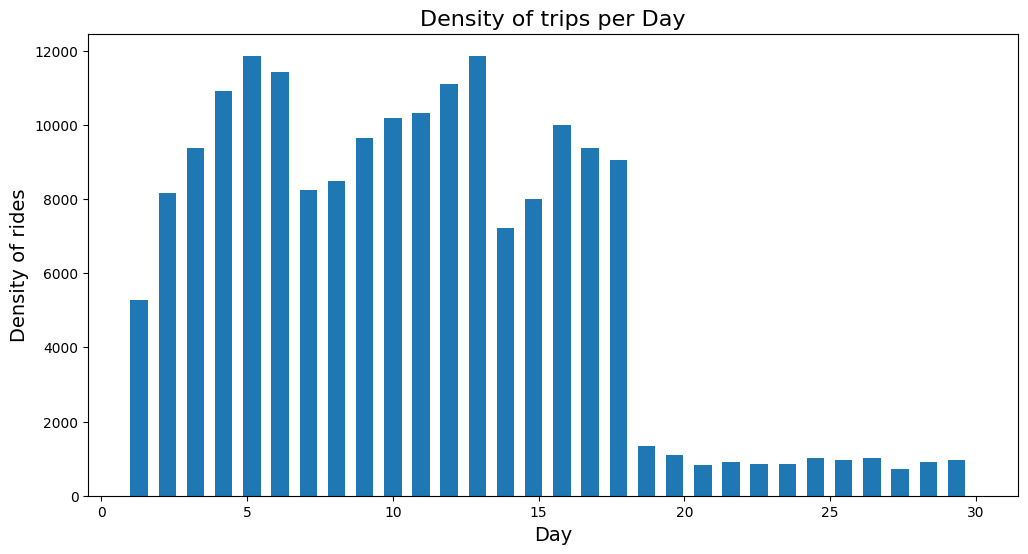

In [7]:
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Day, width= 0.6, bins= 30)
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

Text(0, 0.5, 'Density of rides')

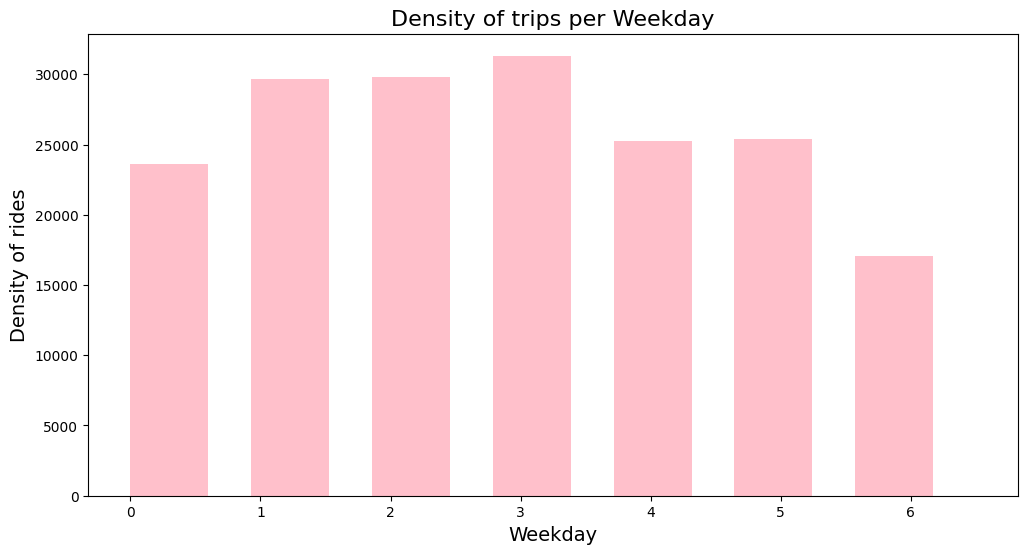

In [12]:
#Visualize the Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Weekday, width= 0.6, range= (0, 6.5), bins=7, color= "pink")
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

The busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the least number of rides.

<ipython-input-20-1ead3c6b989d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df["Weekday"])


<Axes: xlabel='Weekday', ylabel='Density'>

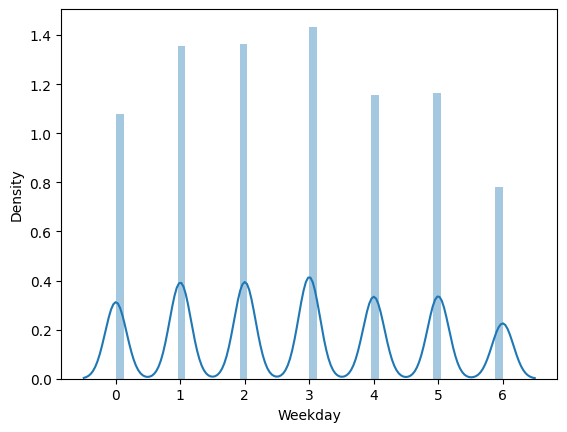

In [20]:
sns.distplot(uber_df["Weekday"])

Text(0, 0.5, 'Density of rides')

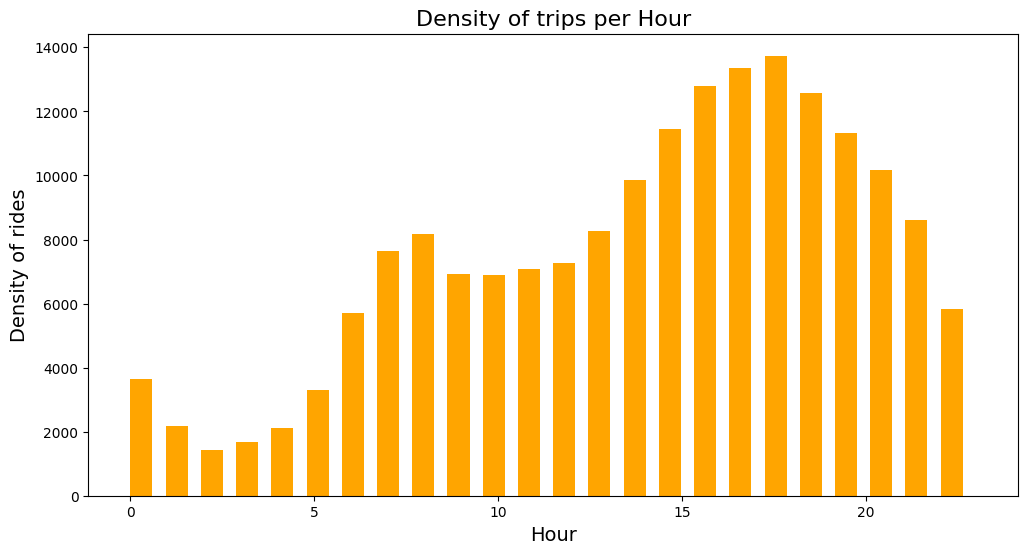

In [9]:
#Visualize the Density of rides per hour
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Hour, width= 0.6, bins=24, color= "orange")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.



Text(0, 0.5, 'Density of rides')

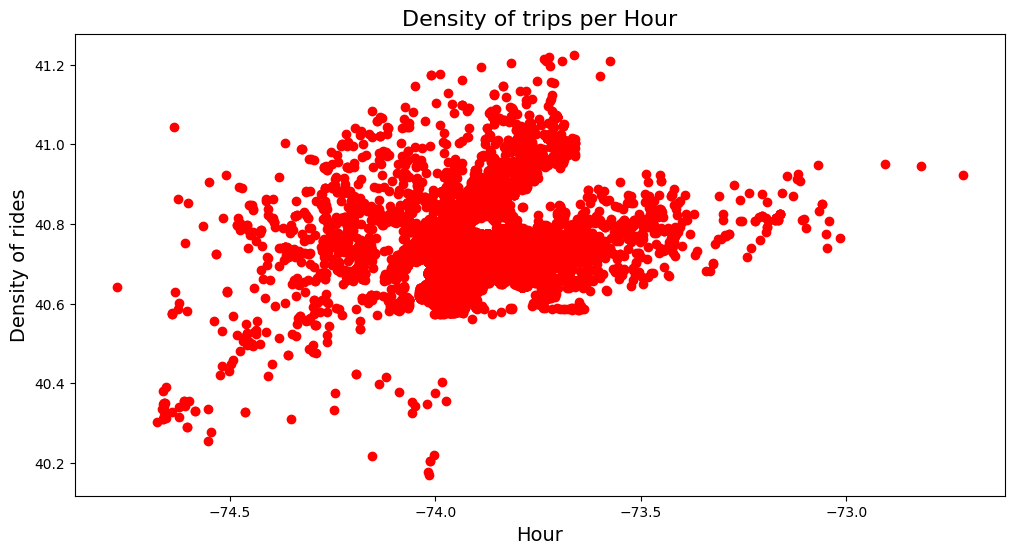

In [11]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= uber_df.Lon
y= uber_df.Lat
plt.scatter(x, y, color= "red")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.


Summary

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

1)Monday is the most profitable day for Uber.

2)On Saturdays less number of people use Uber.

3)6 pm is the busiest day for Uber.

4)On average a rise in Uber trips start around 5 am.

5)Most of the Uber trips originate near the Manhattan region in New York.